# Reti neurali artificiali
## Percettrone Multistrato (MLP)
Le **reti neurali artificiali** sono un modello del machine learning estremamente potente quanto complesso, che funzionano replicando il funzionamento del cervello.
<img src="res/ann.png" width="300px" />
Il **percettrone multistrato** è un'architettura di rete neurale cositutia da una rete di **neuroni (chiamati anche nodi)** distribuiti su più **layers**:

 * Un layer di input: in cui il numero di neuroni corrisponde al numero di proprietà del nostro dataset.
 * Un layer di output: in cui il numero di neuroni corrisponde al numero di classi.
 * Uno o più **hidden layers**: livelli intermedi che utilizzano l'output del layer precendente per apprendere nuove proprietà.
   * Una rete neurale con un solo hidden layer è anche definita vanilla neural network.
   * Una rete neurale con due o più hidden layers è anche definita deep neural network (rete neurale profonda)
  
Ogni neurone di un hidden layer corrisponde ad un percettrone e l'attivazione di ognuno di essi è data da una funzione di attivazione non lineare.
<br><br>
Per essere addestrata correttamente una rete neurale richiede un numero elevato di esempi per l'addestramento, per questo utilizzeremo il MNIST dataset, un dataset di immagini di cifre scritte a mano contenente 60.000 esempi per l'addestramento e 10.000 per il test.
<br><br>
Importiamo le librerie necessarie.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

E' possibile scaricare il dataset da [questo sito](http://yann.lecun.com/exdb/mnist/), devi scaricare i seguenti 4 files:
 * train-images-idx3-ubyte.gz
 * train-labels-idx1-ubyte.gz
 * t10k-images-idx3-ubyte.gz
 * t10k-labels-idx1-ubyte.gz
 
poi decomprimili e inseriscili all'interno di una cartella "MNIST", **senza rinominarli**.<br>
I files con le proprietà contengono immagini in formato binario, quindi ho scritto una funzione che ti permette di ottenere direttamente gli array di train e test da questi files (la puoi trovare all'interno del file mnist.py)

In [2]:
from scripts.mnist import load_mnist

X_train, X_test, Y_train, Y_test = load_mnist(path="MNIST")
print("Numero totale di proprietà: "+str(X_train.shape[1]))
print("Esempi di training: "+str(X_train.shape[0]))
print("Esempi di test: "+str(X_test.shape[0]))

Numero totale di proprietà: 784
Esempi di training: 60000
Esempi di test: 10000


Le immagini hanno una dimensione di 28x28 pixels, quindi un esempio ha 784 proprietà.<br>
Eseguiamo la normalizzazione di train set e test set.

In [3]:
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

/Users/giuseppe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


## Regressione logistica
Proviamo ad utilizzare una regressione logistica per classificare gli esempi del MNIST.
<br>
(Potrebbe richiedere diversi minuti)

In [4]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=.1)
lr.fit(X_train,Y_train)

y_pred_train = lr.predict(X_train)
y_prob_train = lr.predict_proba(X_train)

y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)

accuracy_train = accuracy_score(Y_train, y_pred_train)
accuracy_test = accuracy_score(Y_test, y_pred)

loss_train = log_loss(Y_train, y_prob_train)
loss_test = log_loss(Y_test, y_prob)

print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
print("LOG LOSS: TRAIN=%.4f TEST=%.4f" % (loss_train,loss_test))

ACCURACY: TRAIN=0.9219 TEST=0.9190
LOG LOSS: TRAIN=0.3400 TEST=0.3491


## Percettrone multistrato

### Vanilla Neural Network
Adesso creiamo un percettrone multistrato con un unico hidden layer contenente 100 neuroni.<br>
Utilizziamo la classe MLPClassifier di scikit-learn, questa classe ha un numero di parametri da far girare la testa, cosa normale per una rete neurale, noi utilizziamo soltanto il parametro hidden_layer_sizes, all'interno del quale possiamo specificare il numero di hidden layers e di nodi per ognuno di essi.<br>
Settiamo il parametro verbose a True per visualizzare l'addestramento in maniera dinamica.
(Potrebbe richiedere diversi minuti)

In [5]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), verbose=True)
mlp.fit(X_train, Y_train)
    
y_pred_train = mlp.predict(X_train)
y_prob_train = mlp.predict_proba(X_train)
    
y_pred = mlp.predict(X_test)
y_prob = mlp.predict_proba(X_test)
    
accuracy_train = accuracy_score(Y_train, y_pred_train)
accuracy_test = accuracy_score(Y_test, y_pred)

loss_train = log_loss(Y_train, y_prob_train)
loss_test = log_loss(Y_test, y_prob)
    
print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
print("LOG LOSS: TRAIN=%.4f TEST=%.4f" % (loss_train,loss_test))

Iteration 1, loss = 0.44368044
Iteration 2, loss = 0.19904102
Iteration 3, loss = 0.14393636
Iteration 4, loss = 0.11504007
Iteration 5, loss = 0.09355989
Iteration 6, loss = 0.07967415
Iteration 7, loss = 0.06928596
Iteration 8, loss = 0.06017960
Iteration 9, loss = 0.05376226
Iteration 10, loss = 0.04630842
Iteration 11, loss = 0.04090972
Iteration 12, loss = 0.03628725
Iteration 13, loss = 0.03296102
Iteration 14, loss = 0.02834152
Iteration 15, loss = 0.02546431
Iteration 16, loss = 0.02270396
Iteration 17, loss = 0.02026919
Iteration 18, loss = 0.01757873
Iteration 19, loss = 0.01564977
Iteration 20, loss = 0.01419510
Iteration 21, loss = 0.01207955
Iteration 22, loss = 0.01126946
Iteration 23, loss = 0.01007579
Iteration 24, loss = 0.00846965
Iteration 25, loss = 0.00787523
Iteration 26, loss = 0.00645711
Iteration 27, loss = 0.00659266
Iteration 28, loss = 0.00578791
Iteration 29, loss = 0.00514584
Iteration 30, loss = 0.00474435
Iteration 31, loss = 0.00369315
Iteration 32, los

Il percettrone multistrato ci ha fornito dei risultati pazzeschi con un unico hidden layer.

### Deep Neural Network
Addesso proviamo a complicare un pò la nostra rete, aumentando il numero di nodi ed aggiungendo un ulteriore hidden layers.<br>
(può richiedere anche più di qualche minuto, vai a farti un caffè)

In [5]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(512,512,), verbose=True)
mlp.fit(X_train, Y_train)
    
y_pred_train = mlp.predict(X_train)
y_prob_train = mlp.predict_proba(X_train)
    
y_pred = mlp.predict(X_test)
y_prob = mlp.predict_proba(X_test)
    
accuracy_train = accuracy_score(Y_train, y_pred_train)
accuracy_test = accuracy_score(Y_test, y_pred)

loss_train = log_loss(Y_train, y_prob_train)
loss_test = log_loss(Y_test, y_prob)
    
print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
print("LOG LOSS: TRAIN=%.4f TEST=%.4f" % (loss_train,loss_test))

Iteration 1, loss = 0.24789502
Iteration 2, loss = 0.08537535
Iteration 3, loss = 0.05418424
Iteration 4, loss = 0.03851311
Iteration 5, loss = 0.02711614
Iteration 6, loss = 0.02149203
Iteration 7, loss = 0.01366985
Iteration 8, loss = 0.01758042
Iteration 9, loss = 0.01327700
Iteration 10, loss = 0.01247445
Iteration 11, loss = 0.01144570
Iteration 12, loss = 0.01038476
Iteration 13, loss = 0.01110416
Iteration 14, loss = 0.00844966
Iteration 15, loss = 0.01177277
Iteration 16, loss = 0.00838593
Iteration 17, loss = 0.00748877
Iteration 18, loss = 0.00747844
Iteration 19, loss = 0.00761782
Iteration 20, loss = 0.01021046
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
ACCURACY: TRAIN=0.9964 TEST=0.9809
LOG LOSS: TRAIN=0.0109 TEST=0.0943


La nostra rete neurale profonda ci ha fornito dei risultati ancora migliori !
Visualizziamo gli esempi del test set che ha sbagliato a classificare

Numero 9 classificato come 4


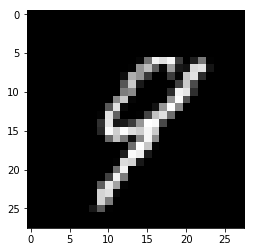

Numero 2 classificato come 9


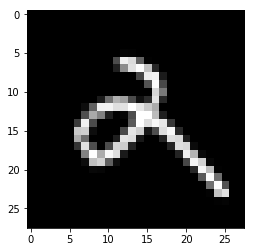

Numero 9 classificato come 8


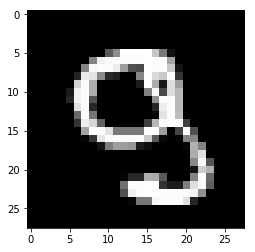

Numero 4 classificato come 6


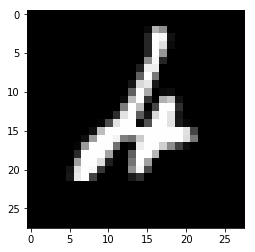

Numero 2 classificato come 7


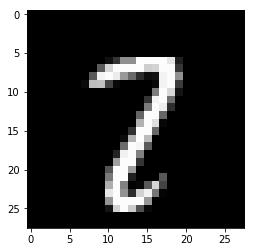

Numero 5 classificato come 3


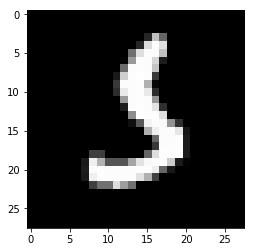

Numero 1 classificato come 8


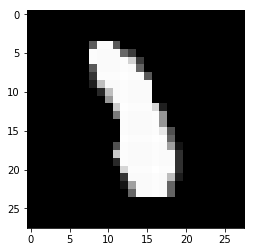

Numero 5 classificato come 3


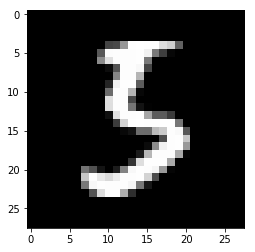

Numero 5 classificato come 8


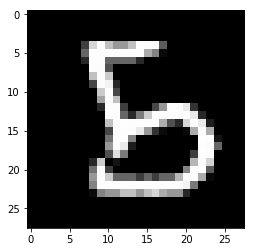

Numero 9 classificato come 8


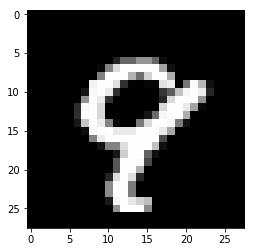

Numero 1 classificato come 3


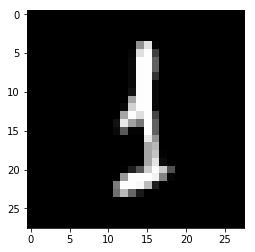

Numero 5 classificato come 4


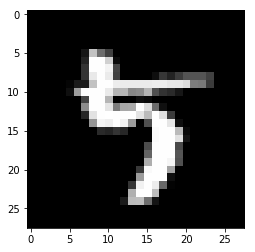

Numero 6 classificato come 5


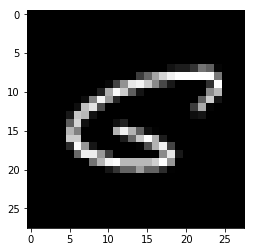

Numero 7 classificato come 3


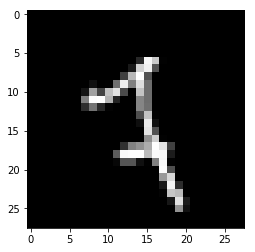

Numero 4 classificato come 6


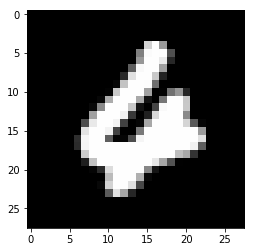

Numero 7 classificato come 8


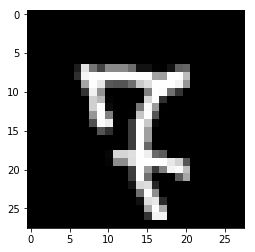

Numero 6 classificato come 8


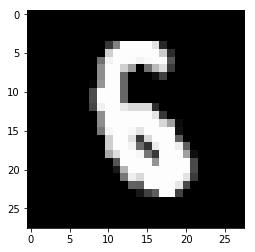

Numero 2 classificato come 4


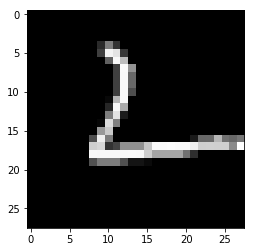

Numero 7 classificato come 2


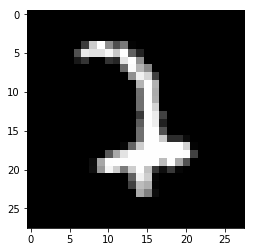

Numero 9 classificato come 4


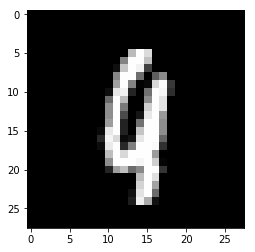

Numero 9 classificato come 3


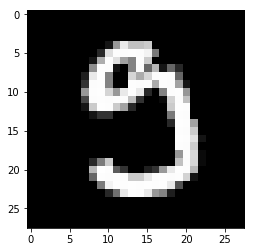

Numero 7 classificato come 1


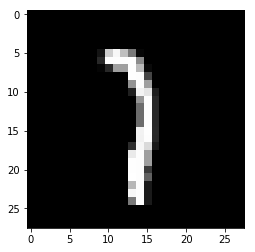

Numero 9 classificato come 8


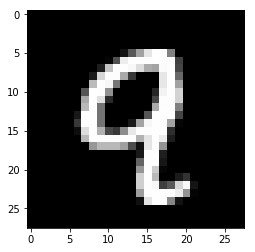

Numero 5 classificato come 7


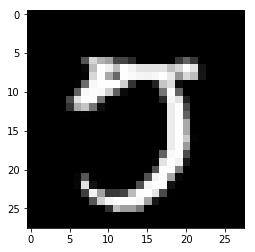

Numero 8 classificato come 3


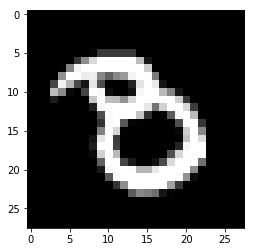

Numero 5 classificato come 3


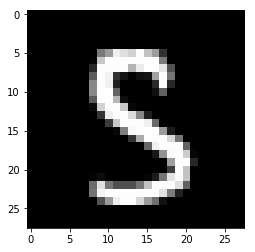

Numero 3 classificato come 8


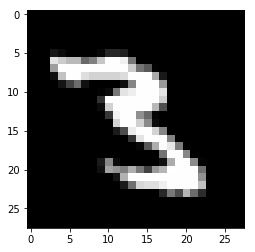

Numero 5 classificato come 3


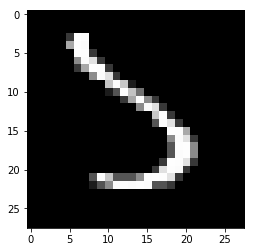

Numero 2 classificato come 8


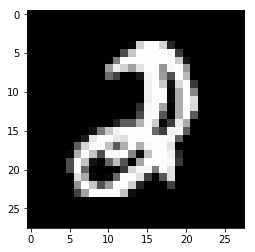

Numero 7 classificato come 9


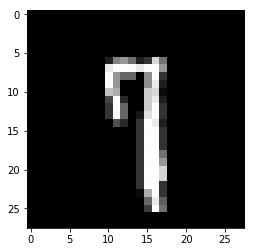

Numero 8 classificato come 7


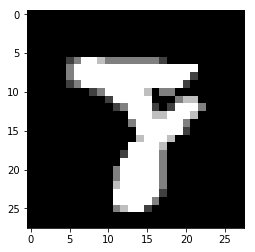

Numero 4 classificato come 6


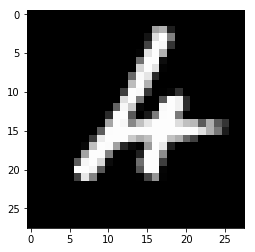

Numero 9 classificato come 8


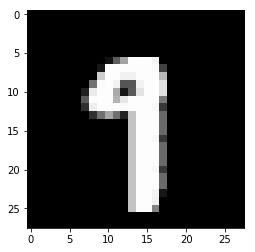

Numero 6 classificato come 4


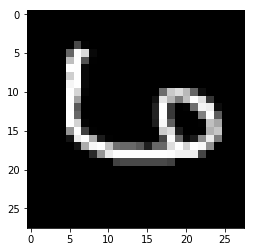

Numero 2 classificato come 3


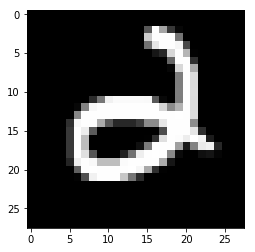

Numero 0 classificato come 6


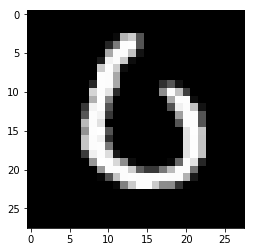

Numero 2 classificato come 6


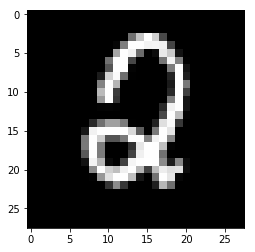

Numero 2 classificato come 0


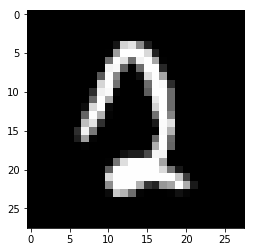

Numero 3 classificato come 7


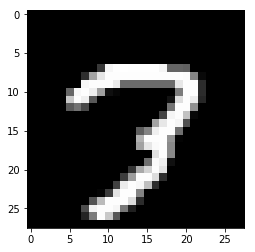

Numero 9 classificato come 3


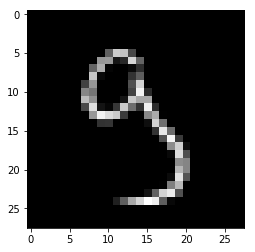

Numero 0 classificato come 6


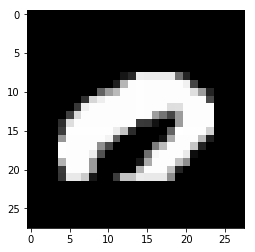

Numero 7 classificato come 1


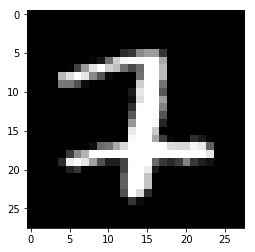

Numero 9 classificato come 4


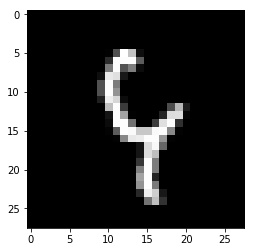

Numero 3 classificato come 8


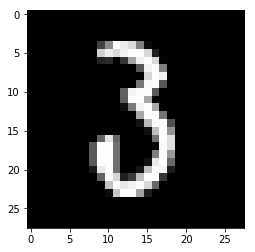

Numero 2 classificato come 0


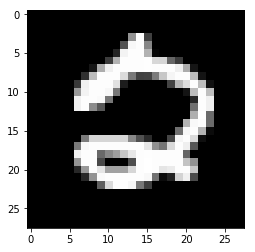

Numero 1 classificato come 8


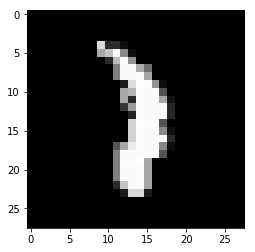

Numero 5 classificato come 6


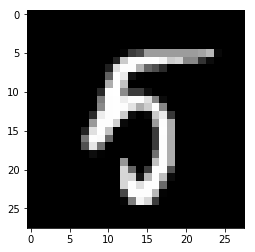

Numero 5 classificato come 3


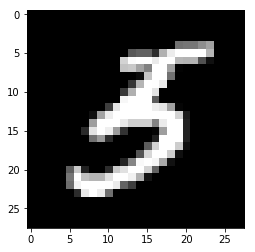

Numero 2 classificato come 0


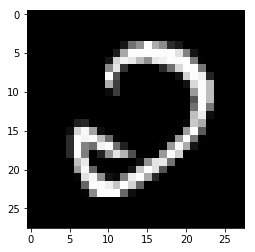

Numero 3 classificato come 7


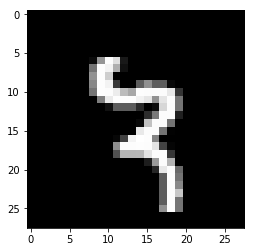

Numero 5 classificato come 8


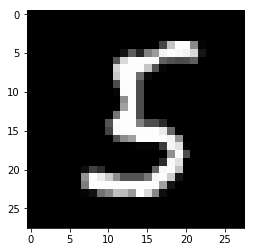

Numero 5 classificato come 9


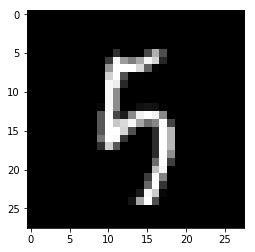

Numero 6 classificato come 1


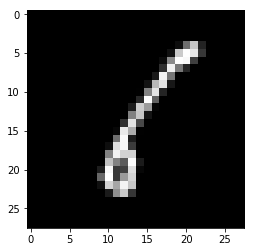

Numero 5 classificato come 8


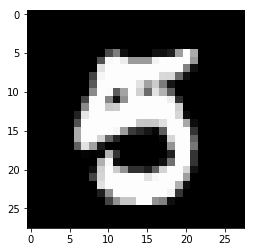

Numero 1 classificato come 2


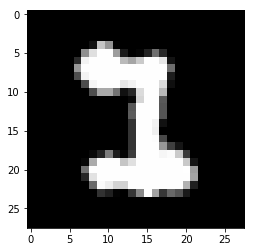

Numero 0 classificato come 8


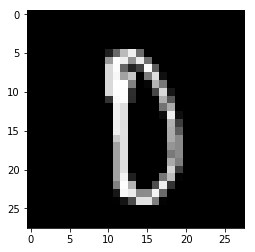

Numero 5 classificato come 8


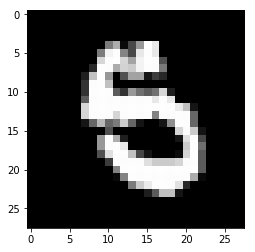

Numero 9 classificato come 6


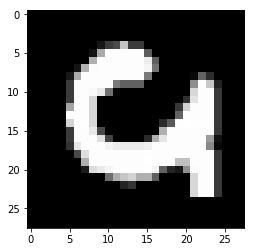

Numero 5 classificato come 3


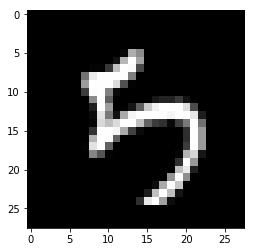

Numero 9 classificato come 1


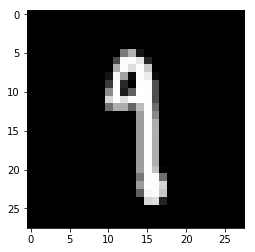

Numero 5 classificato come 3


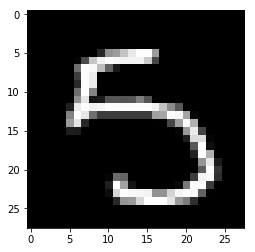

Numero 9 classificato come 4


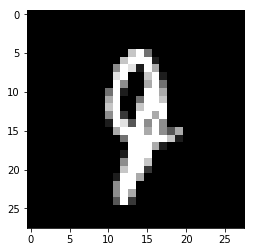

Numero 2 classificato come 4


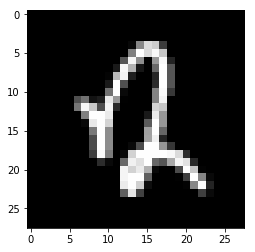

Numero 5 classificato come 3


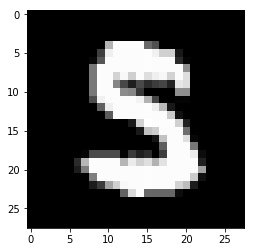

Numero 5 classificato come 8


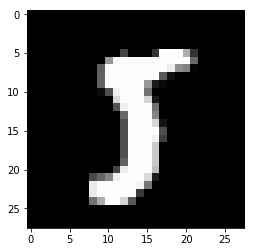

Numero 5 classificato come 3


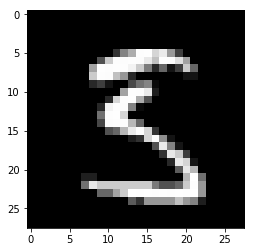

Numero 7 classificato come 1


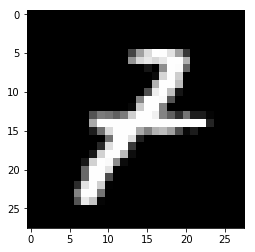

Numero 6 classificato come 1


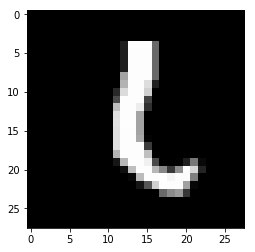

Numero 0 classificato come 8


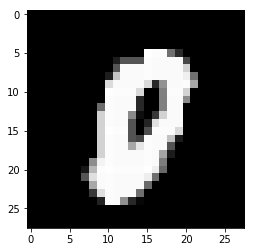

Numero 9 classificato come 4


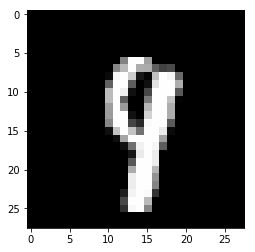

Numero 7 classificato come 4


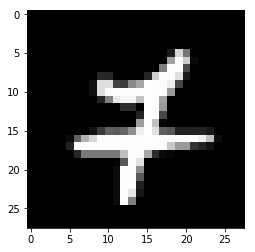

Numero 5 classificato come 8


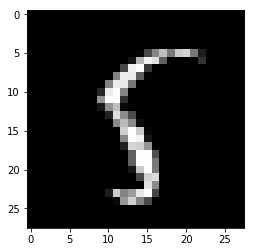

Numero 3 classificato come 8


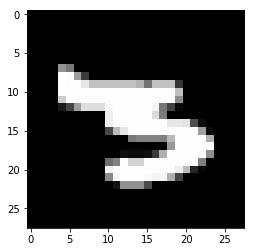

Numero 5 classificato come 3


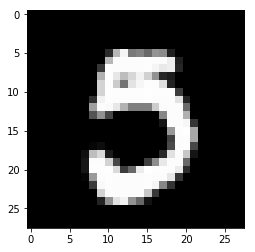

Numero 4 classificato come 7


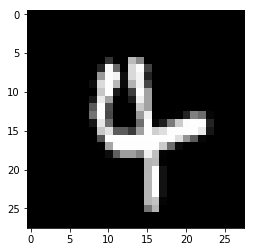

Numero 3 classificato come 8


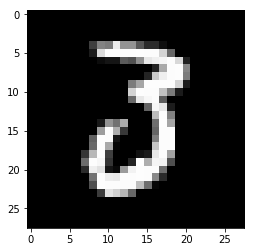

Numero 9 classificato come 7


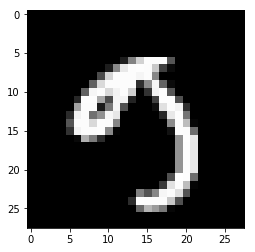

Numero 6 classificato come 8


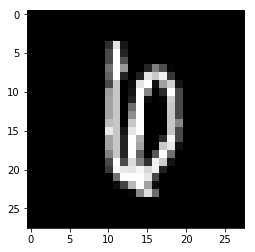

Numero 5 classificato come 9


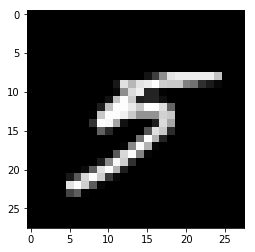

Numero 5 classificato come 9


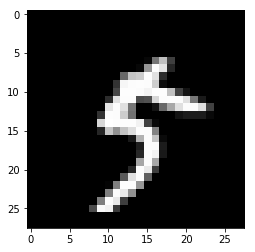

Numero 0 classificato come 8


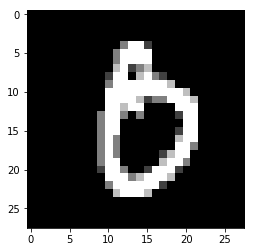

Numero 8 classificato come 7


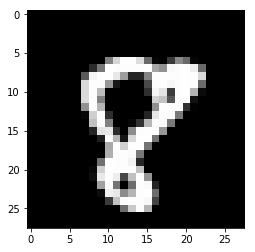

Numero 2 classificato come 3


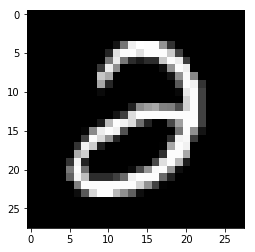

Numero 3 classificato come 7


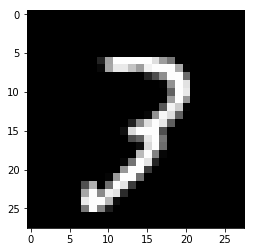

Numero 9 classificato come 1


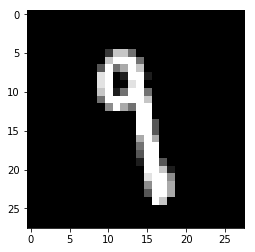

Numero 6 classificato come 4


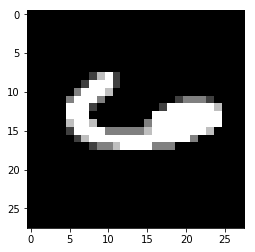

Numero 5 classificato come 3


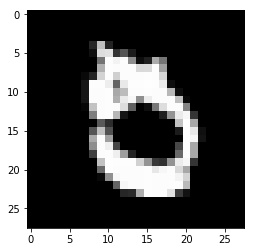

Numero 5 classificato come 8


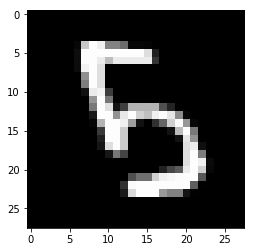

Numero 9 classificato come 3


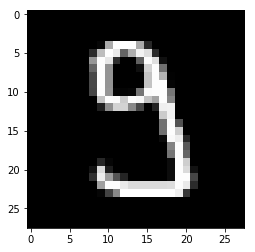

Numero 5 classificato come 8


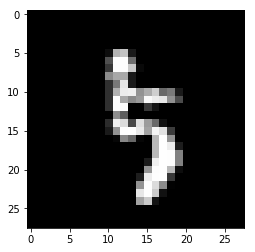

Numero 5 classificato come 8


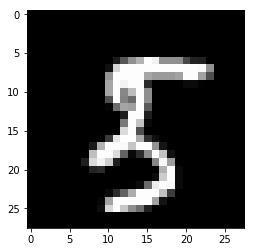

Numero 4 classificato come 6


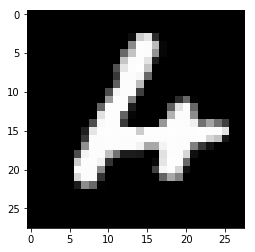

Numero 2 classificato come 8


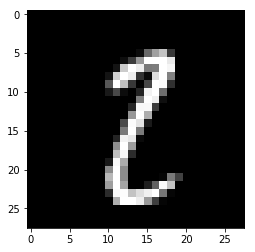

Numero 7 classificato come 8


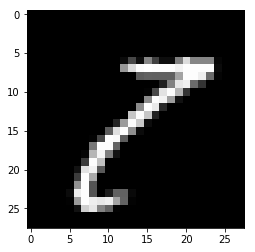

Numero 0 classificato come 4


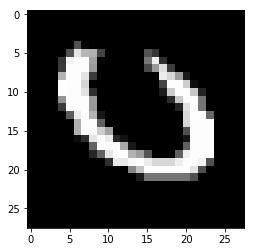

Numero 6 classificato come 5


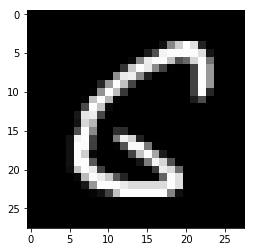

Numero 9 classificato come 4


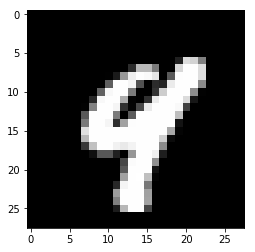

Numero 2 classificato come 3


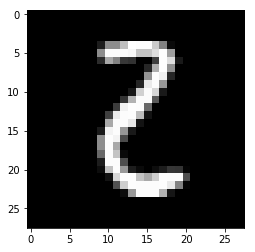

Numero 5 classificato come 3


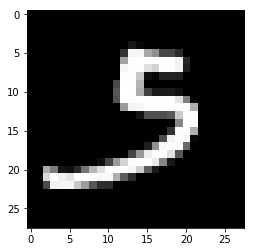

Numero 1 classificato come 3


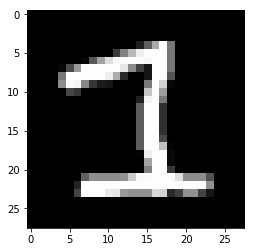

Numero 4 classificato come 6


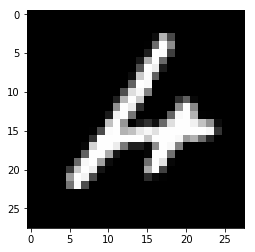

Numero 2 classificato come 3


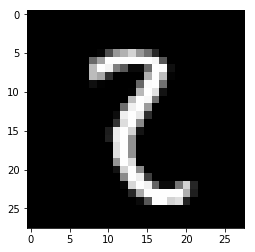

Numero 5 classificato come 3


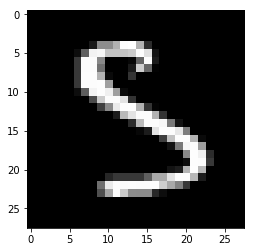

Numero 9 classificato come 4


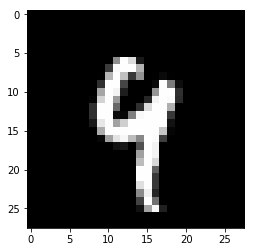

Numero 9 classificato come 8


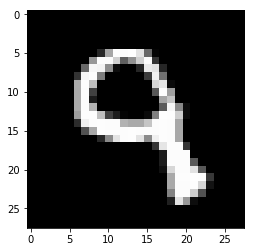

Numero 7 classificato come 4


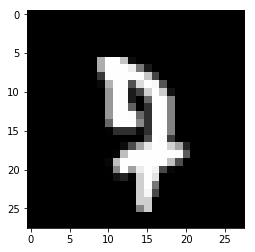

Numero 0 classificato come 8


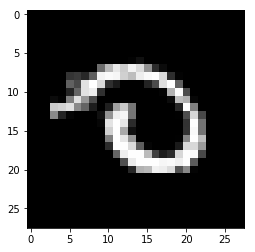

Numero 2 classificato come 8


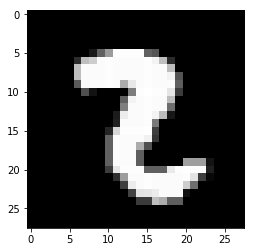

Numero 2 classificato come 6


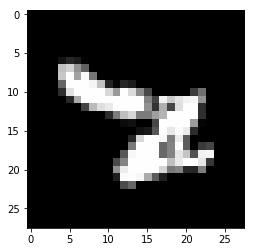

Numero 2 classificato come 8


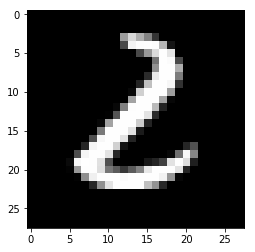

Numero 7 classificato come 9


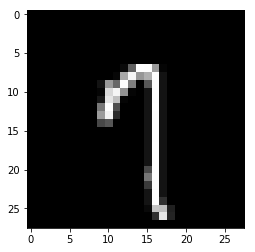

Numero 7 classificato come 3


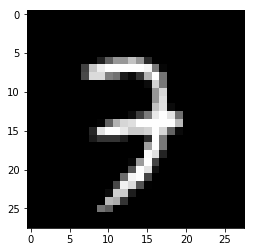

Numero 2 classificato come 8


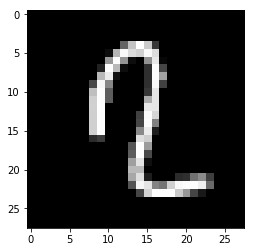

Numero 5 classificato come 3


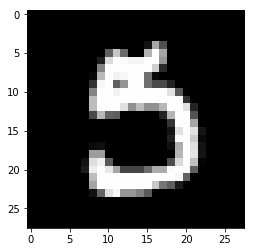

Numero 5 classificato come 3


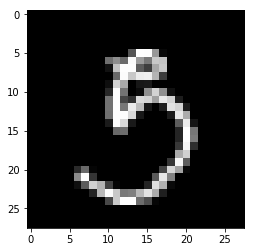

Numero 3 classificato come 7


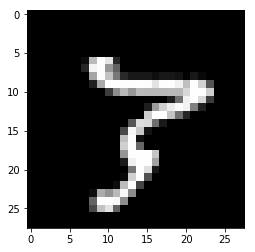

Numero 9 classificato come 8


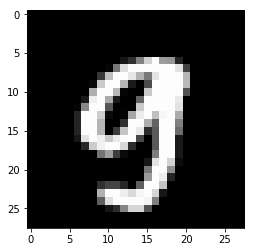

Numero 5 classificato come 8


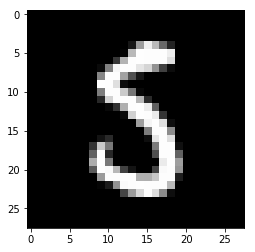

Numero 5 classificato come 9


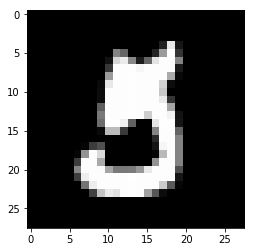

Numero 9 classificato come 4


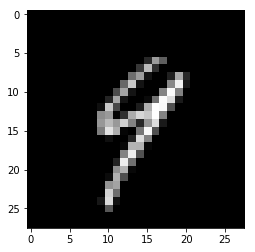

Numero 0 classificato come 6


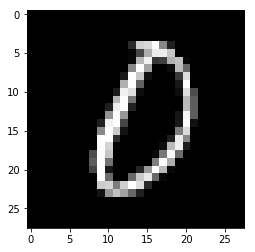

Numero 0 classificato come 6


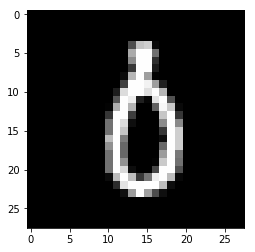

Numero 8 classificato come 7


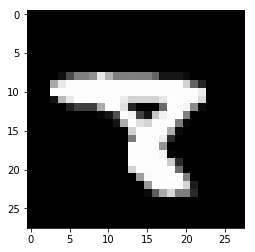

Numero 6 classificato come 5


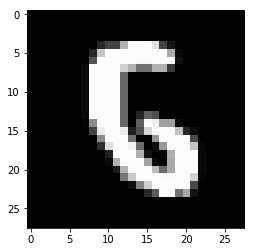

Numero 8 classificato come 9


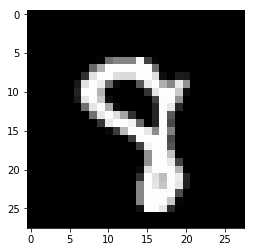

Numero 7 classificato come 2


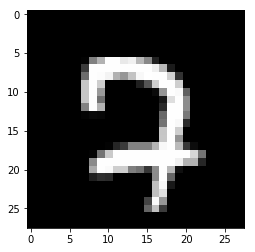

Numero 2 classificato come 3


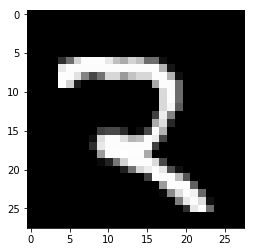

Numero 9 classificato come 8


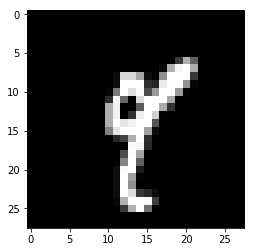

Numero 8 classificato come 3


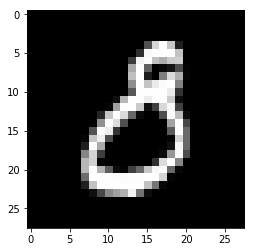

Numero 9 classificato come 4


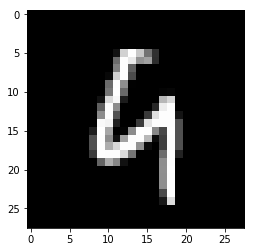

Numero 2 classificato come 4


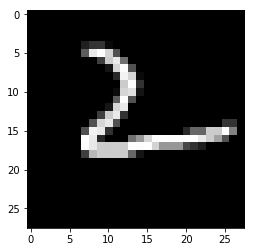

Numero 0 classificato come 8


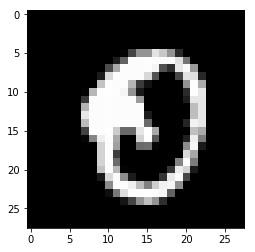

Numero 7 classificato come 8


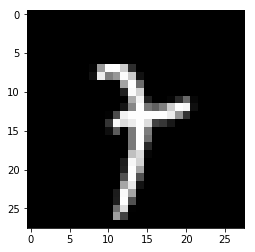

Numero 2 classificato come 8


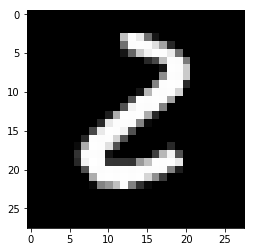

Numero 1 classificato come 6


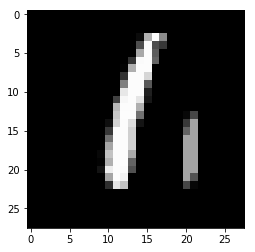

Numero 1 classificato come 8


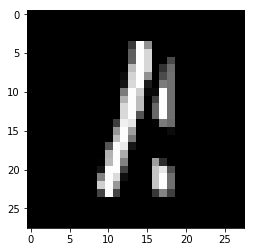

Numero 7 classificato come 9


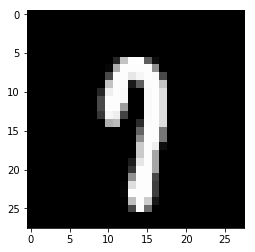

Numero 2 classificato come 8


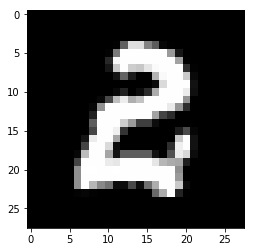

Numero 1 classificato come 8


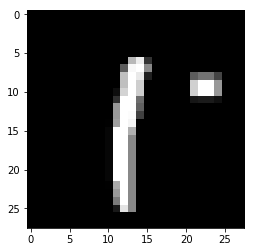

Numero 4 classificato come 3


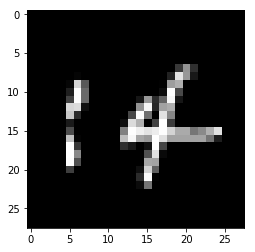

Numero 9 classificato come 7


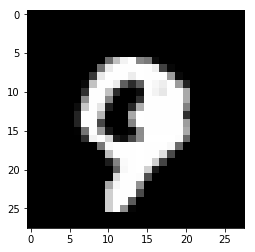

Numero 0 classificato come 8


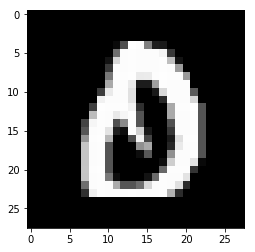

Numero 5 classificato come 3


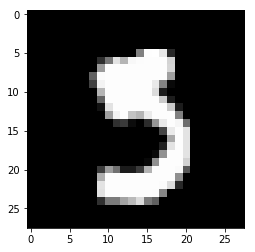

Numero 3 classificato come 8


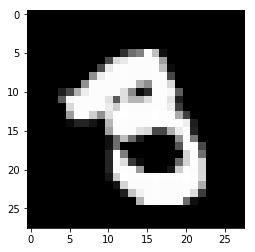

Numero 5 classificato come 3


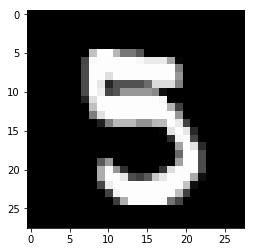

Numero 3 classificato come 8


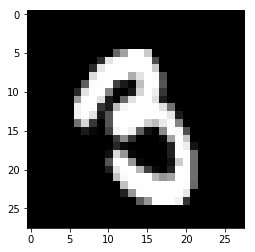

Numero 5 classificato come 9


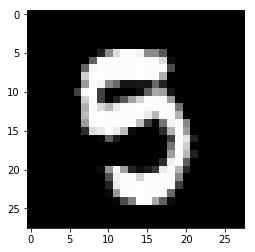

Numero 5 classificato come 3


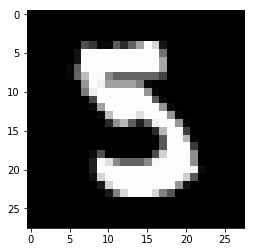

Numero 5 classificato come 3


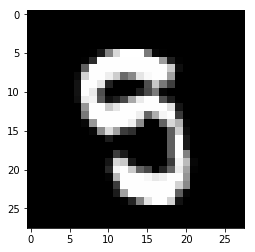

Numero 3 classificato come 9


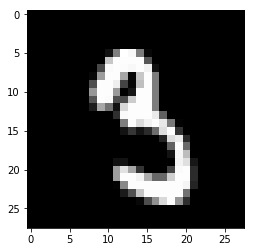

Numero 5 classificato come 3


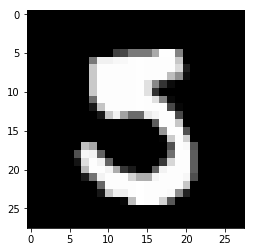

Numero 5 classificato come 3


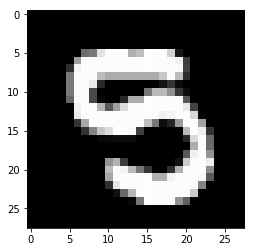

Numero 5 classificato come 3


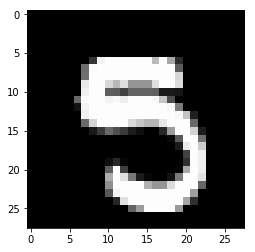

Numero 3 classificato come 8


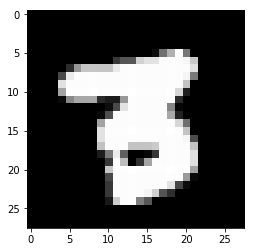

Numero 9 classificato come 7


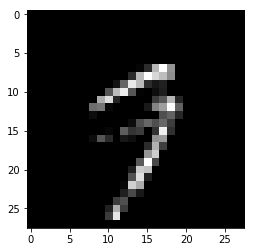

Numero 2 classificato come 6


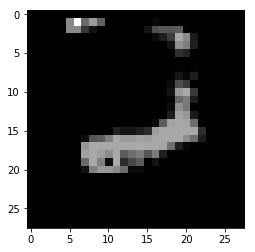

Numero 8 classificato come 7


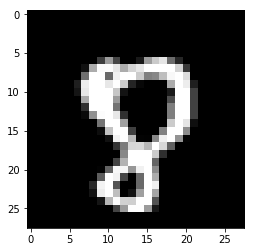

Numero 8 classificato come 9


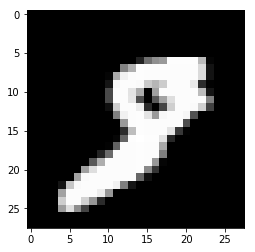

Numero 1 classificato come 6


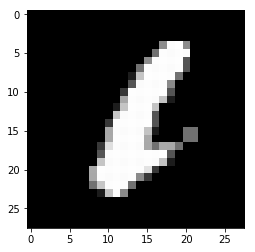

Numero 0 classificato come 6


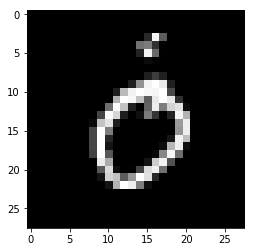

Numero 0 classificato come 6


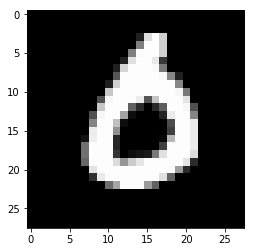

Numero 4 classificato come 8


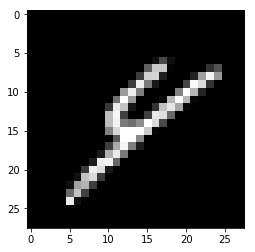

Numero 5 classificato come 8


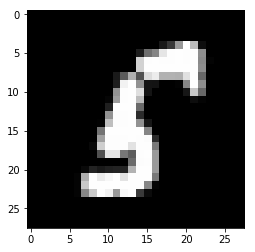

Numero 2 classificato come 8


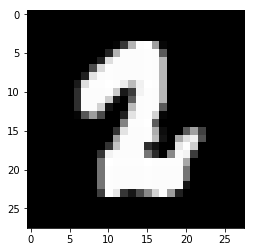

Numero 2 classificato come 8


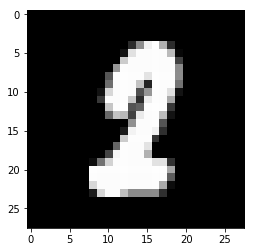

Numero 3 classificato come 9


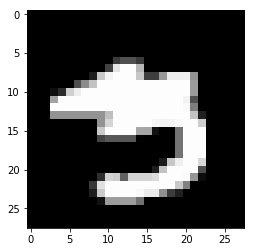

Numero 3 classificato come 8


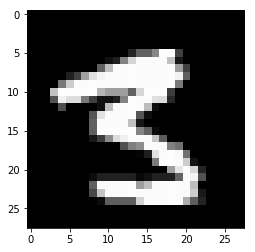

Numero 3 classificato come 9


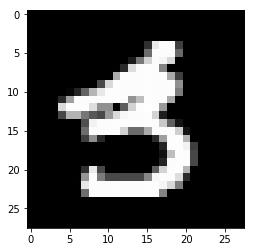

Numero 0 classificato come 6


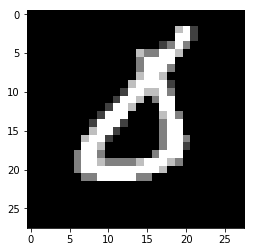

Numero 8 classificato come 6


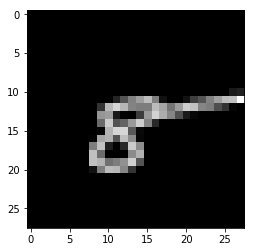

Numero 5 classificato come 6


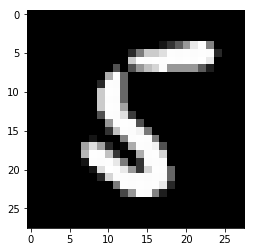

Numero 7 classificato come 2


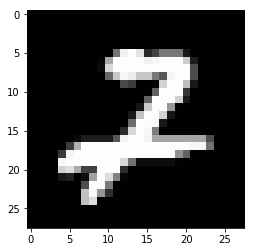

Numero 7 classificato come 2


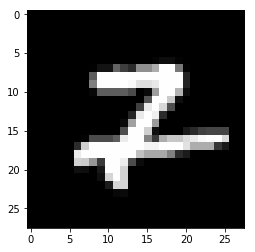

Numero 7 classificato come 2


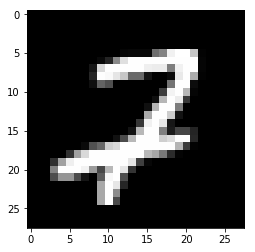

Numero 5 classificato come 3


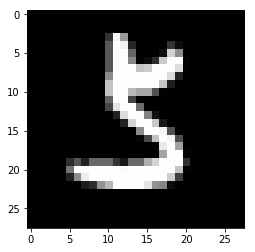

Numero 9 classificato come 7


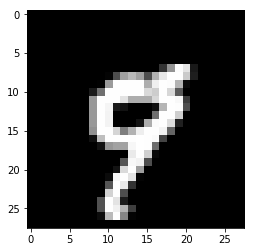

Numero 9 classificato come 4


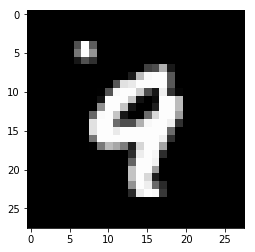

Numero 0 classificato come 1


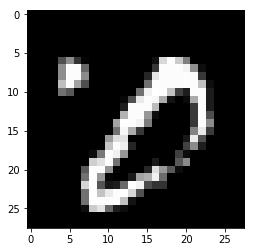

Numero 2 classificato come 7


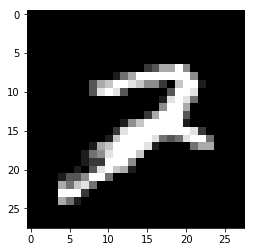

Numero 4 classificato come 7


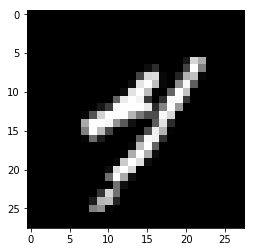

Numero 6 classificato come 3


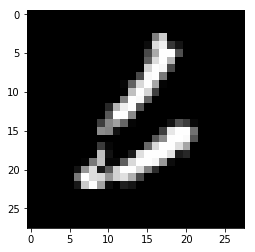

Numero 5 classificato come 6


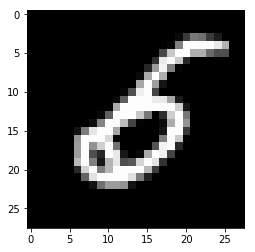

Numero 9 classificato come 7


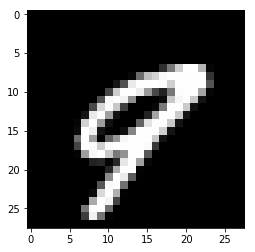

Numero 3 classificato come 8


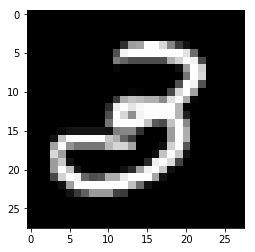

Numero 5 classificato come 3


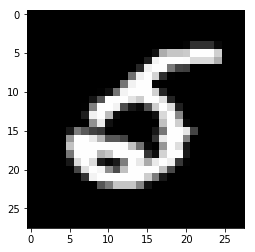

Numero 5 classificato come 0


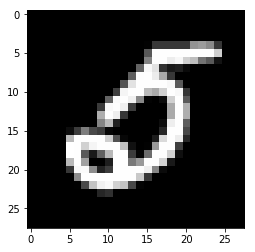

Numero 9 classificato come 4


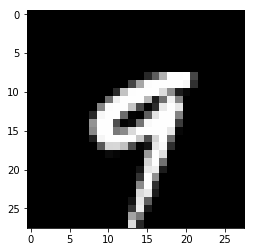

Numero 2 classificato come 3


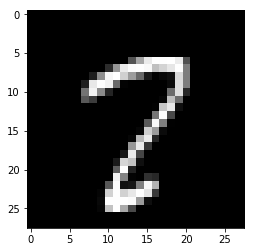

Numero 0 classificato come 6


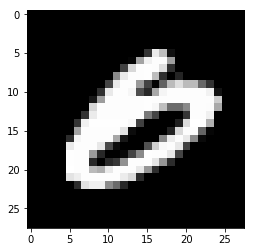

Numero 6 classificato come 8


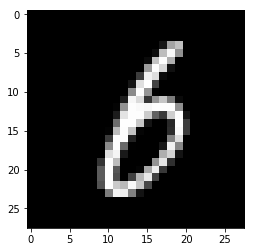

Numero 5 classificato come 8


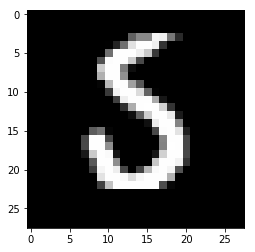

In [6]:
for i in range(0,len(X_test)):
    if(Y_test[i]!=y_pred[i]):
        print("Numero %d classificato come %d" % (Y_test[i], y_pred[i]))
        plt.imshow(X_test[i].reshape([28,28]), cmap="gray")
        plt.show()